<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 71kB 928kB/s eta 0:00:011


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [5]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [9]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [20]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [22]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1622124724620, 40109.30184969603],
 [1622128532962, 40046.73321092796],
 [1622131649783, 39715.13065866956],
 [1622135816817, 38893.992727625984],
 [1622139155476, 39094.83645132579]]

Finally lets turn this data into a Pandas DataFrame.


In [23]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1622124724620,40109.301850
1,1622128532962,40046.733211
2,1622131649783,39715.130659
3,1622135816817,38893.992728
4,1622139155476,39094.836451
...,...,...
716,1624701610439,31469.137112
717,1624705210906,31061.030531
718,1624708850549,32073.289849
719,1624712526711,31700.343191


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [25]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data['date']

0      2021-05-27
1      2021-05-27
2      2021-05-27
3      2021-05-27
4      2021-05-27
          ...    
716    2021-06-26
717    2021-06-26
718    2021-06-26
719    2021-06-26
720    2021-06-26
Name: date, Length: 721, dtype: object

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [26]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2021-05-27  38373.860975  40109.301850  40109.301850  38541.079756
1   2021-05-28  35076.872522  38371.880070  38371.880070  35336.082856
2   2021-05-29  33846.607820  37050.556152  35744.457735  34363.022086
3   2021-05-30  33970.688099  36251.761333  34537.419075  35726.046487
4   2021-05-31  34306.896758  37230.114854  35714.752020  36934.451092
5   2021-06-01  35663.453003  37715.798820  37715.798820  36451.907824
6   2021-06-02  36233.029570  38174.225418  36663.448346  37587.034649
7   2021-06-03  37339.291099  39501.065673  37451.660847  39100.676932
8   2021-06-04  36321.025062  39151.316184  39151.316184  37160.492643
9   2021-06-05  35072.140405  37966.091306  36848.909698  35072.140405
10  2021-06-06  35502.108234  36356.780991  35605.821928  35502.108234
11  2021-06-07  34150.238383  36750.903651  35834.474474  34183.150733
12  2021-06-08  31681.562668  33901.499467  33901.499467  33502.495642
13  2021-06-09  32580.523479  37187.329901  33175.471094  37187.329901
14  2021-06-10  36430.957724  38407.469192  37484.664195  36834.548304
15  2021-06-11  36370.131461  37623.469170  37061.695204  37358.577094
16  2021-06-12  35217.561657  37253.824363  37253.824363  35801.512385
17  2021-06-13  34950.574994  39247.729632  35666.149779  38964.719676
18  2021-06-14  39037.476848  40852.104134  39147.705679  40319.243269
19  2021-06-15  39805.654954  40666.801420  40624.513053  40107.399334
20  2021-06-16  38411.140558  40517.290737  40378.202550  38596.661586
21  2021-06-17  37730.609381  39502.727671  38321.454657  37832.146340
22  2021-06-18  35335.928275  38193.619142  38193.619142  35515.728173
23  2021-06-19  35108.236802  36297.337563  35773.765018  35776.056426
24  2021-06-20  33928.239407  35920.666751  35681.026120  35793.102762
25  2021-06-21  31512.945473  35787.077405  35787.077405  31512.945473
26  2021-06-22  29154.732122  33171.712612  31711.935468  32448.249437
27  2021-06-23  32494.870844  34702.185413  32494.870844  33539.130152
28  2021-06-24  32494.367044  34970.597173  33702.617794  34765.498822
29  2021-06-25  31497.362497  35205.780230  34698.715373  31497.362497
30  2021-06-26  30141.461625  32373.329655  31943.136468  31389.396248

Finally we are now ready to use plotly to create our Candlestick Chart.


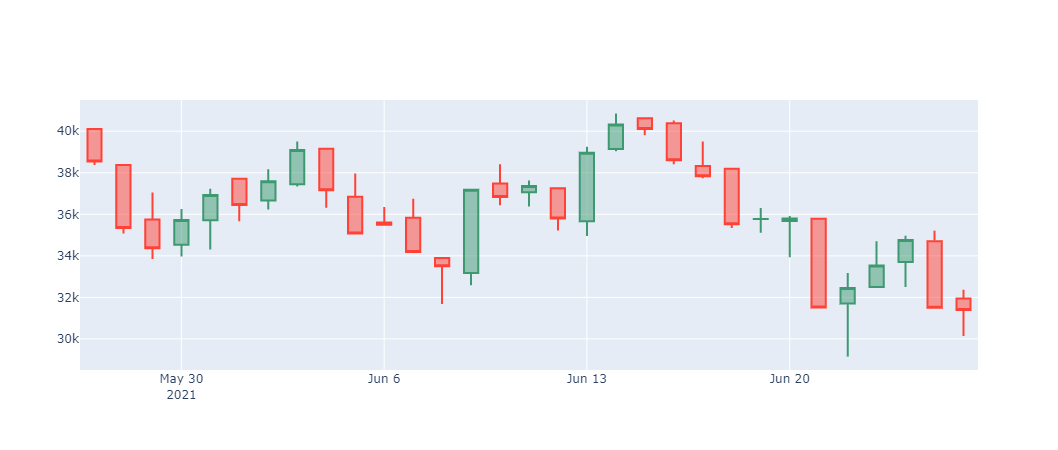

In [27]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-23 | 3.0 | Azim Hirjani | New API |
| 2020-09-09 | 2.1 | Malika Singla | Spell Check |
| 2020-08-26  | 2.0  | Lavanya | Moved lab to course repo in GitLab |
|   |   |   |   |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
